In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [82]:
dataset = pd.read_csv("/content/sample_data/DelayedFlights.csv")

In [83]:
print(dataset.shape)

(1936758, 30)


In [84]:
dataset.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [85]:
dataset.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [86]:
#column types
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [88]:
#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2)
dataset.loc[dataset['ArrDelay'] <= 15, 'Status'] = 0
dataset.loc[(dataset['ArrDelay'] > 15) & (dataset['ArrDelay'] < 60), 'Status'] = 1
dataset.loc[dataset['ArrDelay'] >= 60, 'Status'] = 2

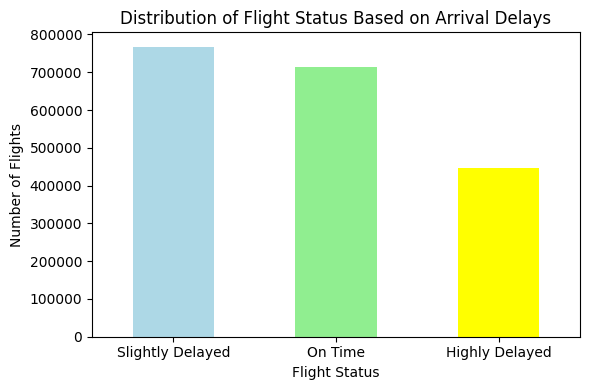

In [89]:
# Create a mapping for status labels
status_labels = {0: 'On Time', 1: 'Slightly Delayed', 2: 'Highly Delayed'}

# Replace status numbers with labels
dataset['Status'] = dataset['Status'].map(status_labels)

# Count the number of flights in each status category
status_counts = dataset['Status'].value_counts()

# Plot the results
fig, ax = plt.subplots(figsize=(6, 4))

status_counts.plot(kind='bar', ax=ax, color=['lightblue', 'lightgreen', 'yellow'])
ax.set_xlabel('Flight Status')
ax.set_ylabel('Number of Flights')
ax.set_title('Distribution of Flight Status Based on Arrival Delays')

ax.set_xticklabels(status_counts.index, rotation=0)

plt.tight_layout()
plt.show()


In [90]:
# Filter out rows where either arrival delay or departure delay is under 0
filtered_data_delays = dataset[(dataset['ArrDelay'] > 0) & (dataset['DepDelay'] > 0)]

filtered_data_delays.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,On Time
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,On Time
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,Slightly Delayed
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,On Time
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,Slightly Delayed


In [100]:
# Create a copy of the original dataset
filtered_data = filtered_data_delays.copy()

# Create a dictionary mapping month numbers to names
month_mapping = {i: calendar.month_name[i] for i in range(1, 13)}
filtered_data['MonthName'] = filtered_data['Month'].map(month_mapping)
filtered_data['MonthName'] = filtered_data['MonthName'].astype('object')

# Drop the original 'Month' column
filtered_data.drop(columns=['Month'], inplace=True)

In [101]:
filtered_data.head()

,Unnamed: 0,Year,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status,MonthName
1,1,2008,3,4,754.0,735,1002.0,1000,WN,3231,...,0,N,0,NaN,NaN,NaN,NaN,NaN,On Time,January
2,2,2008,3,4,628.0,620,804.0,750,WN,448,...,0,N,0,NaN,NaN,NaN,NaN,NaN,On Time,January
3,4,2008,3,4,1829.0,1755,1959.0,1925,WN,3920,...,0,N,0,2.0,0.0,0.0,0.0,32.0,Slightly Delayed,January
4,5,2008,3,4,1940.0,1915,2121.0,2110,WN,378,...,0,N,0,NaN,NaN,NaN,NaN,NaN,On Time,January
5,6,2008,3,4,1937.0,1830,2037.0,1940,WN,509,...,0,N,0,10.0,0.0,0.0,0.0,47.0,Slightly Delayed,January


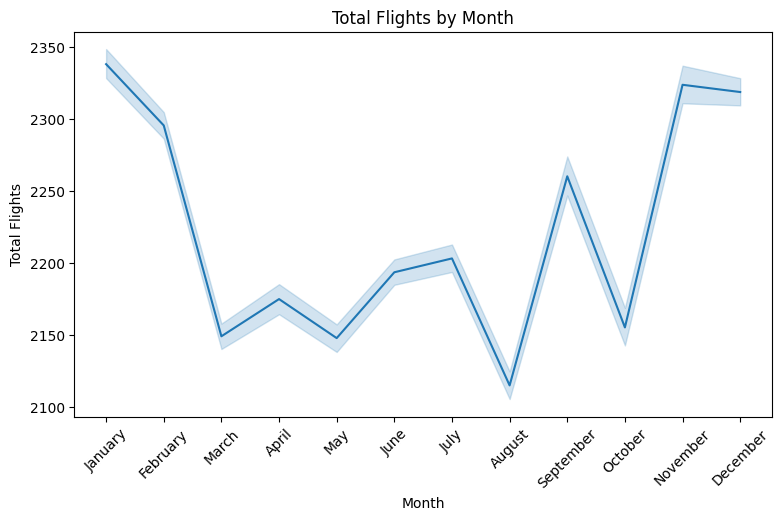

In [92]:
#Line plot showing Total Flights by Month
plt.figure(figsize=(9, 5))
sns.lineplot(data=filtered_data, x="MonthName", y="FlightNum")
plt.title('Total Flights by Month')
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.xticks(rotation=45)
plt.show()

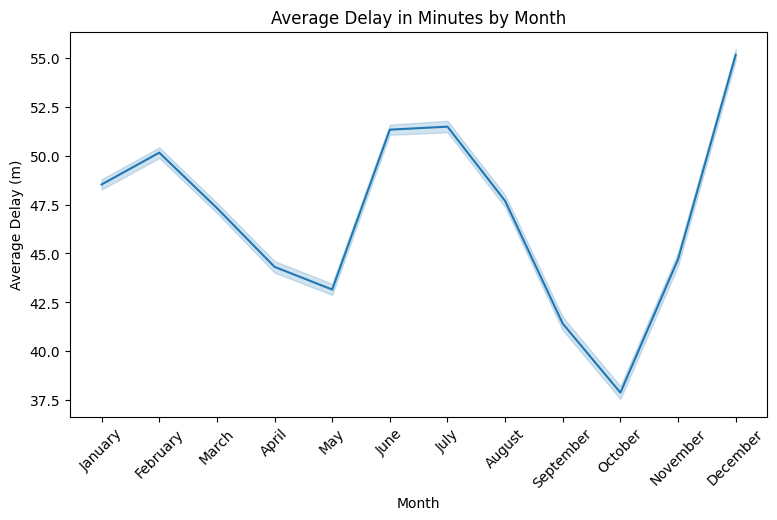

In [93]:
#line plot showing the average delay (in minutes) by month
plt.figure(figsize=(9,5))
sns.lineplot(data=filtered_data, x="MonthName", y="ArrDelay")
plt.title('Average Delay in Μinutes by Μonth')
plt.xlabel('Month')
plt.ylabel('Average Delay (m)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-102-9261db1301d6>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x="DayOfWeekName", y="ArrDelay", order=order, ci=None)


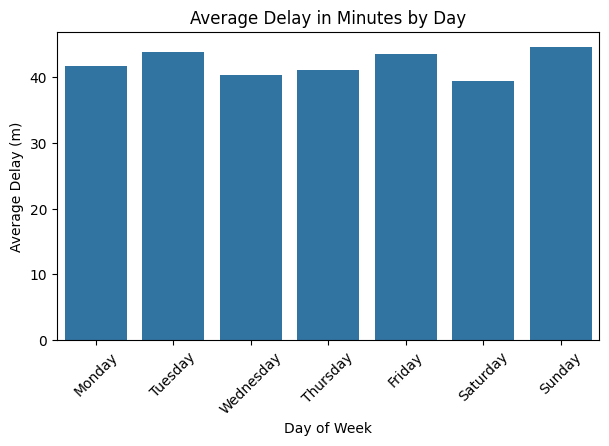

In [102]:
# Create a mapping from numerical days to day names
day_name_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Map the numerical days to day names
dataset['DayOfWeekName'] = dataset['DayOfWeek'].map(day_name_mapping)

# Define the order of days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting
plt.figure(figsize=(7, 4))
sns.barplot(data=dataset, x="DayOfWeekName", y="ArrDelay", order=order, ci=None)
plt.title('Average Delay in Minutes by Day')
plt.xlabel('Day of Week')
plt.ylabel('Average Delay (m)')
plt.xticks(rotation=45)
plt.show()

In [104]:
# Count the number of flights per aircraft
TailNum_counts = filtered_data['TailNum'].value_counts()
print(TailNum_counts)

TailNum
N325SW    870
N658SW    856
N676SW    851
N77278    844
N641SW    838
         ... 
N76010      1
N859NW      1
N74007      1
N809NW      1
N78008      1
Name: count, Length: 5357, dtype: int64


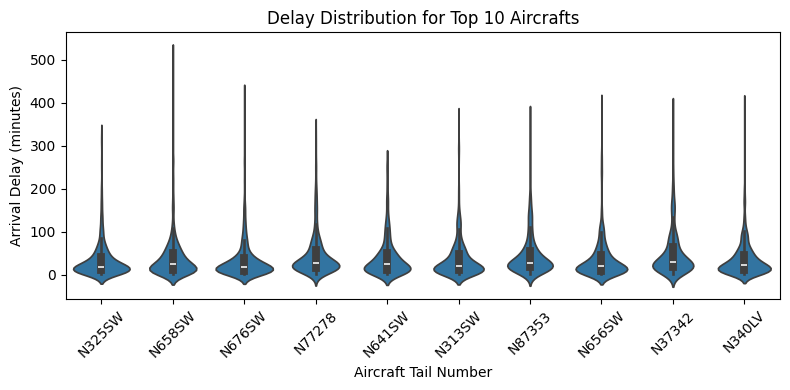

In [106]:
# Identify the top 10 most frequent aircrafts
top10_tailnum = TailNum_counts.head(10).index

# Filter the dataset for these top 10 aircrafts
top10_df = filtered_data[filtered_data['TailNum'].isin(top10_tailnum)]

# Plot the delay distribution for each of these aircrafts
fig, ax = plt.subplots(figsize=(8, 4))

# Using seaborn's boxplot to show delay distribution
sns.violinplot(x='TailNum', y='ArrDelay', data=top10_df, ax=ax, order=top10_tailnum)

ax.set_xlabel('Aircraft Tail Number')
ax.set_ylabel('Arrival Delay (minutes)')
ax.set_title('Delay Distribution for Top 10 Aircrafts')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

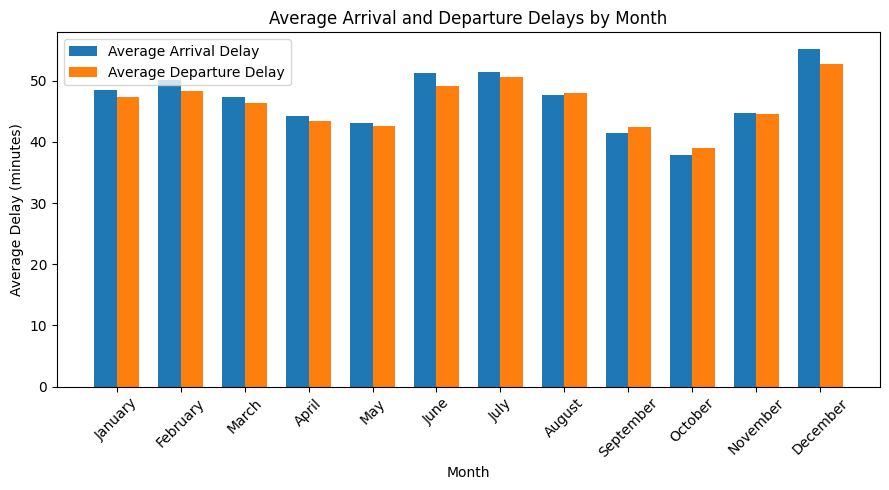

In [107]:
# Convert 'Month' column to a categorical type to maintain order
filtered_data['MonthName'] = pd.Categorical(filtered_data['MonthName'], categories=[
     'January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Group by 'Month' and calculate the average delays
monthly_avg_delays = filtered_data.groupby('MonthName')[['ArrDelay', 'DepDelay']].mean().reset_index()

# Plotting
bar_width = 0.35
fig, ax = plt.subplots(figsize=(9,5))
positions = range(len(monthly_avg_delays['MonthName']))
bar1 = ax.bar([p - bar_width/2 for p in positions], monthly_avg_delays['ArrDelay'], width=bar_width, label='Average Arrival Delay')
bar2 = ax.bar([p + bar_width/2 for p in positions], monthly_avg_delays['DepDelay'], width=bar_width, label='Average Departure Delay')
ax.set_xlabel('Month')
ax.set_ylabel('Average Delay (minutes)')
ax.set_title('Average Arrival and Departure Delays by Month')
ax.set_xticks(positions)
ax.set_xticklabels(monthly_avg_delays['MonthName'], rotation=45)
ax.legend()
plt.tight_layout()

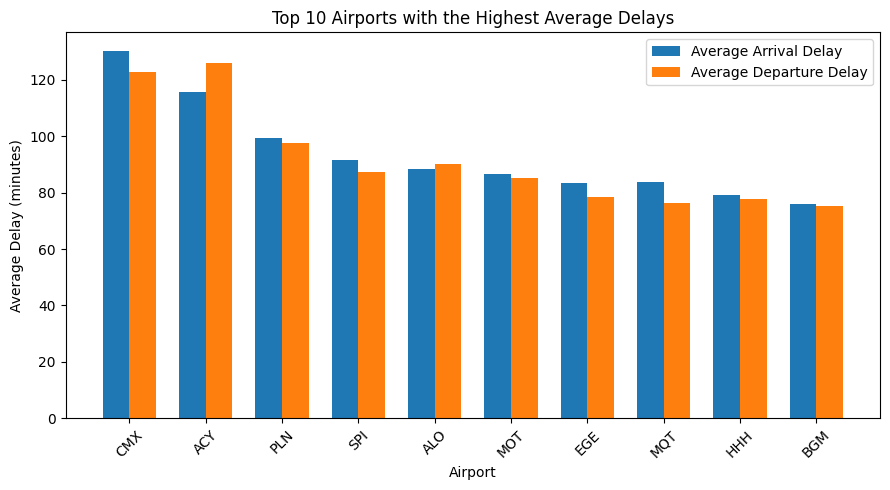

In [108]:
# Group by 'Origin' and calculate the average delays
airport_avg_delays = filtered_data.groupby('Origin')[['ArrDelay', 'DepDelay']].mean().reset_index()

# Calculate the total delay as the sum of arrival and departure delays
airport_avg_delays['TotalDelay'] = airport_avg_delays['ArrDelay'] + airport_avg_delays['DepDelay']

# Sort the airports by total delay in descending order and select the top 10
top10_airports = airport_avg_delays.sort_values(by='TotalDelay', ascending=False).head(10)

# Plotting
bar_width = 0.35
fig, ax = plt.subplots(figsize=(9, 5))
positions = range(len(top10_airports['Origin']))
bar1 = ax.bar([p - bar_width/2 for p in positions], top10_airports['ArrDelay'], width=bar_width, label='Average Arrival Delay')
bar2 = ax.bar([p + bar_width/2 for p in positions], top10_airports['DepDelay'], width=bar_width, label='Average Departure Delay')
ax.set_xlabel('Airport')
ax.set_ylabel('Average Delay (minutes)')
ax.set_title('Top 10 Airports with the Highest Average Delays')
ax.set_xticks(positions)
ax.set_xticklabels(top10_airports['Origin'], rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

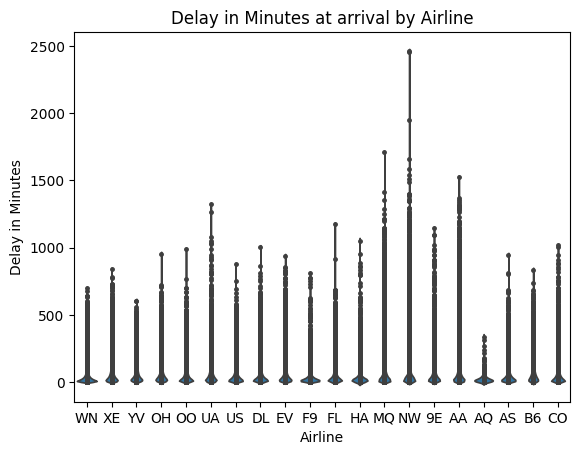

In [109]:
#violin plot that shows the distribution of delay_in_minutes for different airlines while excluding on time flights
sns.violinplot(x="UniqueCarrier", y="ArrDelay",inner= "point", legend=False, data=filtered_data)
plt.title("Delay in Minutes at arrival by Airline")
plt.xlabel("Airline")
plt.ylabel("Delay in Minutes")
plt.show()

# Decision Tree

In [110]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [111]:
# Create a new column 'Status' based on the updated condition
dataset['Status'] = dataset['ArrDelay'].apply(lambda x: 'OnTime' if x == 0 else ('EarlyArrival' if x < 0 else 'Delayed'))
# Verify the unique values in the 'Status' column
print("Unique values in 'Status' before filtering:", dataset['Status'].unique())

# Filter out rows where Status is 'EarlyArrival'
filtered_data = dataset[dataset['Status'] != 'EarlyArrival']
# Verify the unique values in the 'Status' column after filtering
print("Unique values in 'Status' after filtering:", filtered_data['Status'].unique())

# Display the DataFrame to see the result
print(filtered_data.head())

Unique values in 'Status' before filtering: ['EarlyArrival' 'Delayed' 'OnTime']
Unique values in 'Status' after filtering: ['Delayed' 'OnTime']
   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   
5           6  2008      1           3          4   1937.0        1830   

   ArrTime  CRSArrTime UniqueCarrier  ...  Cancelled CancellationCode  \
1   1002.0        1000            WN  ...          0                N   
2    804.0         750            WN  ...          0                N   
3   1959.0        1925            WN  ...          0                N   
4   2121.0        2110            WN  ...          0                N   
5   2037.0        1940            WN  ...     

In [112]:
features = filtered_data[["UniqueCarrier", "TailNum", "Month", "DayOfWeek", "DepTime", "Origin","Dest","Distance","Status"]]
# Make a copy of the original dataframe to encode non-numeric columns
encoded_features = features.copy()

# List of non-numeric columns to encode
non_numeric_cols = ["UniqueCarrier", "TailNum","Origin","Dest","Status"]

# Apply label encoding to each non-numeric column
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    encoded_features[col] = le.fit_transform(encoded_features[col])
    label_encoders[col] = le

<Axes: >

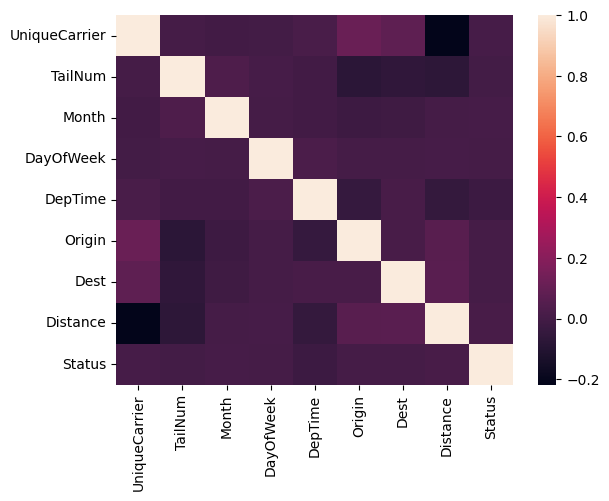

In [113]:
sns.heatmap(encoded_features.corr())

In [114]:
# Calculation of the correlation
correlation_matrix = encoded_features.corr()
print(correlation_matrix)

               UniqueCarrier   TailNum     Month  DayOfWeek   DepTime  \
UniqueCarrier       1.000000  0.005696 -0.007701   0.000862  0.017040   
TailNum             0.005696  1.000000  0.029591   0.006338 -0.005493   
Month              -0.007701  0.029591  1.000000   0.002895 -0.007600   
DayOfWeek           0.000862  0.006338  0.002895   1.000000  0.022590   
DepTime             0.017040 -0.005493 -0.007600   0.022590  1.000000   
Origin              0.112601 -0.076806 -0.019247   0.001821 -0.043438   
Dest                0.081515 -0.064650 -0.017769   0.002586  0.012496   
Distance           -0.217888 -0.074068  0.004780   0.007898 -0.050495   
Status              0.010043 -0.001724  0.006139   0.001931 -0.026947   

                 Origin      Dest  Distance    Status  
UniqueCarrier  0.112601  0.081515 -0.217888  0.010043  
TailNum       -0.076806 -0.064650 -0.074068 -0.001724  
Month         -0.019247 -0.017769  0.004780  0.006139  
DayOfWeek      0.001821  0.002586  0.007898  

In [116]:
#create X and Y dataset
X = encoded_features.drop("Status", axis=1)
y = encoded_features["Status"]

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
X.shape[0] == X_train.shape[0] + X_test.shape[0]

True

In [117]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)
dt_model

y_pred = dt_model.predict(X_test)
dt_score = (accuracy_score(y_test, y_pred)*100)
dt_score

96.52186520131109

Text(0.5, 1.0, 'ROC Curve (Decision Tree)')

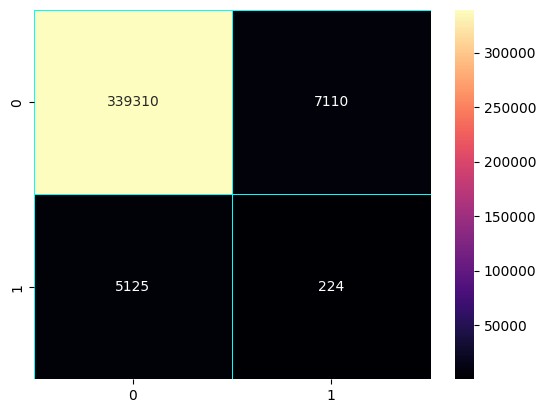

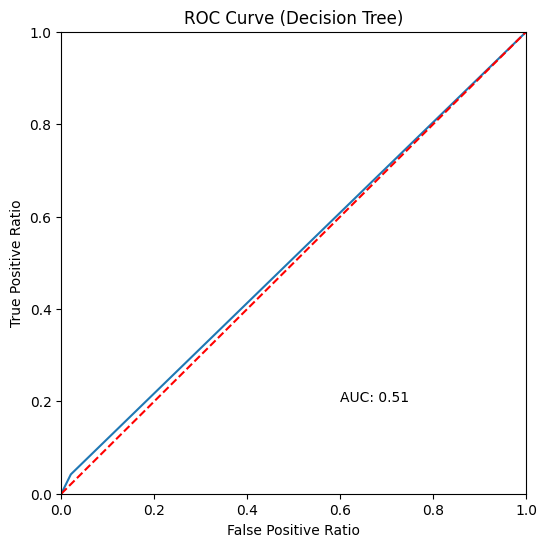

In [118]:
lr_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=lr_cm, annot=True, linewidth=0.7,
            linecolor='cyan', fmt='.0f', cmap='magma')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_dt = roc_auc_score(y_test, y_pred)
auc_dt

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# add the auc score to the plot
plt.text(0.6, 0.2, "AUC: "+str(round(auc_dt, 2)))
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("ROC Curve (Decision Tree)")

In [119]:
feature_names = X.columns
feature_names

# Assuming 'dt_model' from previous cells is the intended classifier
feature_importance = pd.DataFrame(dt_model.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
TailNum,0.305562
DepTime,0.255521
DayOfWeek,0.105285
Distance,0.092048
Month,0.089008
Dest,0.069789
Origin,0.064053
UniqueCarrier,0.018733
